In [1]:
import sys
import os
import shutil
import random
from tqdm import tqdm_notebook
from pathlib import Path

In [6]:
ls_path = "/data/anakuzne/LibriSpeech"

In [2]:
'''
subsets = ["train", "dev", "test"]
ls_path = "/data/anakuzne/LibriSpeech"
main_train_path = f"{ls_path}/dev-clean"

# Copy files, parse transcripts, only makes transcripts with used IDs
num_samples = 1000
all_paths = []
selected_ids = []

for root, dir, files in os.walk(main_train_path):
    for f in files:
        if ".flac" in f:
            p = f"{root}/{f}"
            all_paths.append(p)
random.shuffle(all_paths)
print("All paths", len(all_paths))
'''

'\nsubsets = ["train", "dev", "test"]\nls_path = "/data/anakuzne/LibriSpeech"\nmain_train_path = f"{ls_path}/dev-clean"\n\n# Copy files, parse transcripts, only makes transcripts with used IDs\nnum_samples = 1000\nall_paths = []\nselected_ids = []\n\nfor root, dir, files in os.walk(main_train_path):\n    for f in files:\n        if ".flac" in f:\n            p = f"{root}/{f}"\n            all_paths.append(p)\nrandom.shuffle(all_paths)\nprint("All paths", len(all_paths))\n'

In [3]:
#selected_ids = all_paths[:num_samples]

In [47]:
def create_subset(subset, audio_paths):
    for p in tqdm_notebook(audio_paths):
        split = p.split("/")
        spk = split[-3]
        book = split[-2]
        utt_id = split[-1]
        new_p = f"{ls_path}/debug_subset_{subset}/{spk}/{book}"
        if not os.path.exists(new_p):
            os.makedirs(new_p)
        shutil.copyfile(p, f"{new_p}/{utt_id}")

In [4]:
#create_subset("dev", selected_ids)

In [17]:
def collect_transcripts(subset):
    new_paths = []
    for root, d, files in os.walk(f"{ls_path}/debug_subset_{subset}/"):
        for f in files:
            new_paths.append(f"{root}/{f}")

    for p in tqdm_notebook(new_paths):
        #125-121124.trans.txt
        if '.flac' in p:
            split = p.split("/")
            spk = split[-3]
            book = split[-2]
            utt_id = split[-1].split('.')[0]
            print(utt_id)
    
            trans_file_path = f"{ls_path}/debug_subset_{subset}/{spk}/{book}/{spk}-{book}.trans.txt"
            trans_file_old_path = f"{ls_path}/test-clean/{spk}/{book}/{spk}-{book}.trans.txt"
            if not os.path.exists(trans_file_path):
                Path(trans_file_path).touch()
            with open(trans_file_old_path, 'r') as fo:
                trans_old = fo.readlines()
            trans_new  = open(trans_file_path, "a")
            #find utt_id in the old file
            for line in trans_old:
                if utt_id in line:
                    trans_new.write(line)
                    trans_new.close()
        

In [18]:
collect_transcripts("test")

/tmp/ipykernel_561775/3466616189.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for p in tqdm_notebook(new_paths):


  0%|          | 0/1000 [00:00<?, ?it/s]

2094-142345-0057
2094-142345-0056
2094-142345-0028
2094-142345-0046
2094-142345-0007
2094-142345-0022
2094-142345-0054
2094-142345-0045
2094-142345-0036
2094-142345-0001
2094-142345-0042
2094-142345-0014
2094-142345-0031
2094-142345-0037
2094-142345-0020
2094-142345-0025
2094-142345-0004
2094-142345-0033
2094-142345-0051
2094-142345-0048
2094-142345-0013
4992-41806-0014
4992-41806-0009
4992-41806-0000
4992-41806-0001
4992-41806-0010
4992-41806-0017
4992-41806-0011
4992-41806-0013
4992-41806-0004
4992-41806-0002
4992-23283-0009
4992-23283-0004
4992-23283-0005
4992-23283-0008
4992-23283-0003
4992-23283-0007
4992-23283-0001
4992-23283-0015
4992-23283-0011
4992-41797-0016
4992-41797-0010
4992-41797-0018
4992-41797-0014
4992-41797-0009
4992-41797-0007
8230-279154-0004
8230-279154-0041
8230-279154-0011
8230-279154-0015
8230-279154-0026
8230-279154-0002
8230-279154-0030
8230-279154-0038
8230-279154-0019
8230-279154-0021
8230-279154-0022
8230-279154-0010
8230-279154-0005
8230-279154-0043
4077-

In [1]:
import soundfile as sfl
import torch
from espnet2.torch_utils.device_funcs import to_device
import dac
from espnet2.asr.frontend.default import DefaultFrontend
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
frontend = DefaultFrontend(n_fft = 512, 
                           win_length = 400, 
                           hop_length = 160)

In [3]:
frontend

DefaultFrontend(
  (stft): Stft(n_fft=512, win_length=400, hop_length=160, center=True, normalized=False, onesided=True)
  (frontend): Frontend()
  (logmel): LogMel(sr=16000, n_fft=512, n_mels=80, fmin=0, fmax=8000.0, htk=False)
)

In [2]:
aud, sf = sfl.read("/data/anakuzne/LibriSpeech/train-clean-100/103/1240/103-1240-0014.flac")

In [3]:
ipd.Audio(aud, rate=sf)

In [7]:
input = torch.tensor(aud).float()
lens = input.shape[0]
input = input.view(1, lens, 1)

In [6]:
input_lens = torch.tensor([lens])
input_lens

tensor([223360])

In [7]:
mel, mel_lens = frontend(input, input_lens)

In [145]:
input.shape

torch.Size([1, 223360, 1])

In [147]:
input_lens.shape

torch.Size([1])

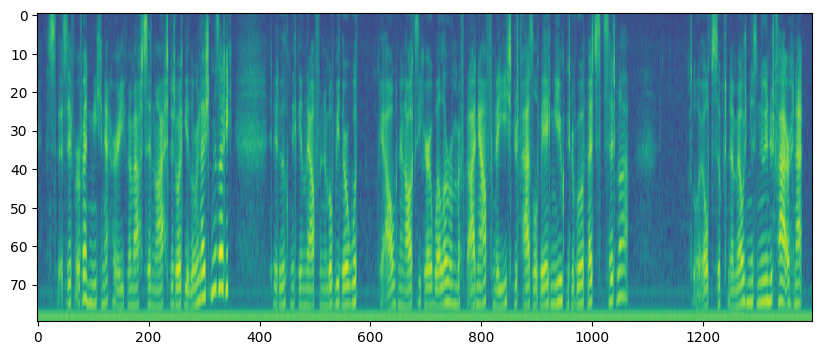

In [9]:
plt.figure(figsize=(10, 4))
plt.imshow(np.flip(mel.squeeze(0).numpy().T), aspect="auto")

In [4]:
model_path = dac.utils.download(model_type="16khz")
model = dac.DAC.load(model_path)

model = model.to('cuda:5')

/home/anakuzne/.local/lib/python3.8/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


In [5]:
model

DAC(
  (encoder): Encoder(
    (block): Sequential(
      (0): Conv1d(1, 64, kernel_size=(7,), stride=(1,), padding=(3,))
      (1): EncoderBlock(
        (block): Sequential(
          (0): ResidualUnit(
            (block): Sequential(
              (0): Snake1d()
              (1): Conv1d(64, 64, kernel_size=(7,), stride=(1,), padding=(3,))
              (2): Snake1d()
              (3): Conv1d(64, 64, kernel_size=(1,), stride=(1,))
            )
          )
          (1): ResidualUnit(
            (block): Sequential(
              (0): Snake1d()
              (1): Conv1d(64, 64, kernel_size=(7,), stride=(1,), padding=(9,), dilation=(3,))
              (2): Snake1d()
              (3): Conv1d(64, 64, kernel_size=(1,), stride=(1,))
            )
          )
          (2): ResidualUnit(
            (block): Sequential(
              (0): Snake1d()
              (1): Conv1d(64, 64, kernel_size=(7,), stride=(1,), padding=(27,), dilation=(9,))
              (2): Snake1d()
              

In [8]:
input_dac = input.view(1, 1, lens).to("cuda:5")

In [9]:
input_dac.shape

torch.Size([1, 1, 223360])

In [10]:
#input_dac = torch.rand(2, 1, 223360).to("cuda:5")

In [21]:
z, codes, latents, _, _ = model.encode(input_dac, n_quantizers=1)
print(z.shape)
y = model.decode(z)

torch.Size([1, 1024, 698])


In [22]:
y.shape

torch.Size([1, 1, 223352])

In [23]:
y_out = y.squeeze(0).squeeze(0).detach().cpu().numpy()

In [20]:
ipd.Audio(aud, rate=sf)

In [24]:
ipd.Audio(y_out, rate=sf)

In [27]:
layer_conv1d = torch.nn.Conv1d(1024, 80, 3, 2).to("cuda:5")

In [28]:
out_conv1d = layer_conv1d(z)

In [30]:
out_conv1d.shape

torch.Size([1, 80, 348])

In [135]:
from espnet.nets.pytorch_backend.transformer.embedding import PositionalEncoding

class Conv2dSubsampling(torch.nn.Module):
    def __init__(self, idim, odim):
        super(Conv2dSubsampling, self).__init__()

        self.conv = torch.nn.Sequential(
            torch.nn.Conv2d(1, odim, 3, 2),
            torch.nn.ReLU(),
            torch.nn.Conv2d(odim, odim, 3, 2),
            torch.nn.ReLU(),
        )
        self.out = torch.nn.Sequential(
            torch.nn.Linear(odim * (((idim - 1) // 2 - 1) // 2), odim), PositionalEncoding(odim, 0.1)
        )

    def forward(self, x):
        x = self.conv(x)
        print(f"Conv: {x.shape}")
        b, c, t, f = x.size()
        x = self.out(x.transpose(1, 2).contiguous().view(b, t, c * f))
        print(f"Linear: {x.shape}")
        return x

In [136]:
embed = Conv2dSubsampling(1024, 1024).to("cuda:7")

In [137]:
z.shape

torch.Size([1, 1, 436, 1024])

In [138]:
embed_out = embed(z)

Conv: torch.Size([1, 1024, 108, 255])
Linear: torch.Size([1, 108, 1024])


In [140]:
embed_out.min()

tensor(-65.9272, device='cuda:7', grad_fn=<MinBackward1>)

In [141]:
embed_out.max()

tensor(63.6269, device='cuda:7', grad_fn=<MaxBackward1>)